# SPPH 500
## Assignment 1
Ly Trinh

Question 2 – Education’s Effect on Contraceptive Use (1-Page Limit) 
 
NOTE:  On Assignment 2, you will explore this data set, conducting an in-depth analysis of it 
 
We would like to study the relationship between education and the use of contraceptives in Fiji, 
in the mid 1970s.  The dataset ContraceptiveUseIndicators.txt is an adaptation of a dataset use 
by Little (1978, reference given below).  The data consists of observations on 1607 married and 
fecund women interviewed in the Fiji Fertility Survey of 1975. 
 
The main research question of interest is to examine the relationship between education and 
contraceptive use in Fiji in the 1970s, while controlling for other confounding variables.  Below is 
a description of the variables contained in the data set.  Note: Age is given as both numeric and 
a categorical variable.  For the assignment, we will work with the categorized ages. 
 
Age = The numeric age 
AgeCat = Categorized ages: A = “<25”, B=”25-29”, C=”30-39”, D=”40-49” 
Education = Education categorized as: 0 = “low”, 1 = “high” 
WantsMore = An indicator if the women wants to have more children: 0 = “no”, 1 = “yes” 
UseContraceptive = An indicator of contraceptive use: 0 = “no”, 1 = “yes” 
     ** You should make sure to convert Education, WantsMore to factors in R 
 
Reference: Little, R. J. A. (1978). Generalized Linear Models for Cross-Classified Data from the WFS. World 
Fertility Survey Technical Bulletins, Number 5. 

In [1]:
# import data
Contra <- read.delim('./ContraceptiveUseIndicators.txt', header = TRUE, sep="")
head(Contra)

Age,AgeCat,Education,WantsMore,UseContraceptive
21,A,0,1,0
18,A,0,1,0
19,A,0,1,0
22,A,0,1,0
17,A,0,1,0
20,A,0,1,0


In [2]:
summary(Contra)

      Age        AgeCat    Education        WantsMore      UseContraceptive
 Min.   :17.00   A:397   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:25.00   B:404   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :30.00   C:612   Median :1.0000   Median :1.0000   Median :0.0000  
 Mean   :30.45   D:194   Mean   :0.6185   Mean   :0.6049   Mean   :0.3155  
 3rd Qu.:36.00           3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :47.00           Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  

In [3]:
# convert variables to factors
Contra$Education <- as.factor(Contra$Education)
Contra$WantsMore <- as.factor(Contra$WantsMore)
Contra$UseContraceptive <- as.factor(Contra$UseContraceptive)

In [4]:
levels(Contra$Education)
levels(Contra$Education) <- c("Low", "High")
levels(Contra$Education)

[1] "0" "1"

[1] "Low"  "High"

In [5]:
levels(Contra$WantsMore)
levels(Contra$WantsMore) <- c("No", "Yes")
levels(Contra$WantsMore)

[1] "0" "1"

[1] "No"  "Yes"

In [9]:
levels(Contra$UseContraceptive)
levels(Contra$UseContraceptive) <- c("No", "Yes")
levels(Contra$UseContraceptive)

[1] "no"  "yes"

[1] "No"  "Yes"

### (a) Descriptive Plot:
Create an appropriate plot for examining the relationship between Contraceptive Use and Education.  Make sure to comment on what you observe in the plot.

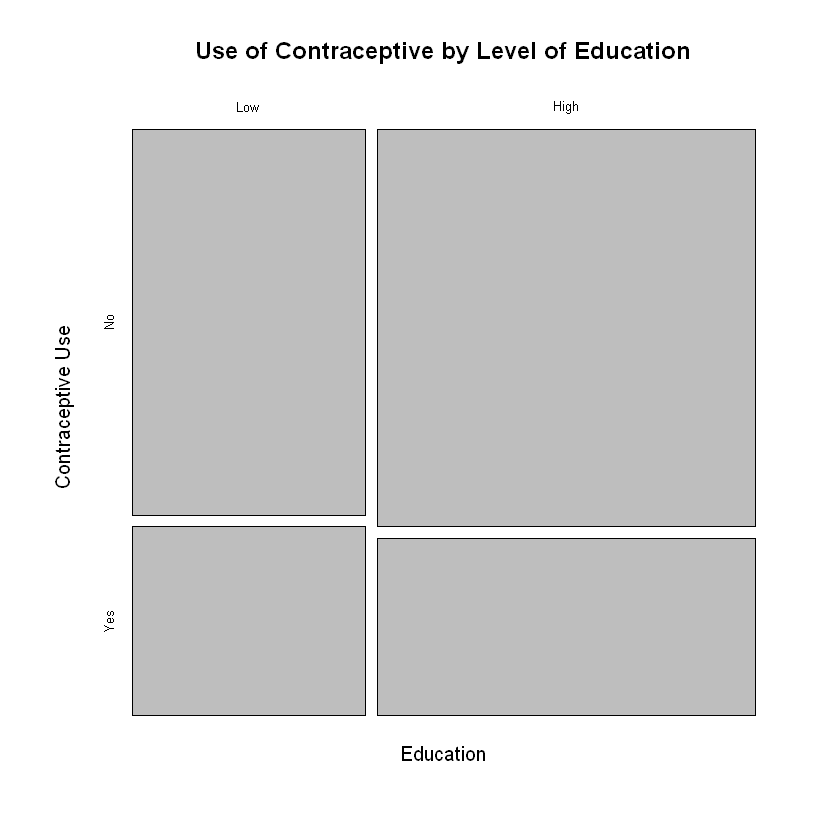

In [12]:
mosaicplot(Education~UseContraceptive, data=Contra,
          main="Use of Contraceptive by Level of Education",
          ylab="Contraceptive Use")

### (b) Odds Ratio:
Calculate and report the unadjusted odds ratio measuring the association between Education and the Use of Contraceptives along with a confidence interval and hypothesis test for the OR. Make sure to provide an interpretation of these.

In [13]:
# install.packages("epiR")
library(epiR)

Loading required package: survival
Package epiR 2.0.41 is loaded
Type help(epi.about) for summary information
Type browseVignettes(package = 'epiR') to learn how to use epiR for applied epidemiological analyses




In [14]:
tab1 <- with(Contra, table(Education, UseContraceptive))[2:1,2:1]
tab1

         UseContraceptive
Education Yes  No
     High 306 688
     Low  201 412

In [15]:
epi.2by2(tab1)

             Outcome +    Outcome -      Total        Inc risk *        Odds
Exposed +          306          688        994              30.8       0.445
Exposed -          201          412        613              32.8       0.488
Total              507         1100       1607              31.5       0.461

Point estimates and 95% CIs:
-------------------------------------------------------------------
Inc risk ratio                                 0.94 (0.81, 1.09)
Odds ratio                                     0.91 (0.73, 1.13)
Attrib risk in the exposed *                   -2.00 (-6.70, 2.69)
Attrib fraction in the exposed (%)            -6.51 (-23.35, 8.02)
Attrib risk in the population *                -1.24 (-5.60, 3.12)
Attrib fraction in the population (%)         -3.93 (-13.56, 4.88)
-------------------------------------------------------------------
Uncorrected chi2 test that OR = 1: chi2(1) = 0.706 Pr>chi2 = 0.401
Fisher exact test that OR = 1: Pr>chi2 = 0.408
 Wald confiden

### (c) Not Enough?:
In a few short sentences, explain why you think this simple bivariate analysis may not be adequate.  You do NOT need to do anything beyond this.  In the 
next assignment, we will begin to work on a multivariable analysis for this data. 